# Homework 2 : Gabriella Zakrocki

### I. Feedforward: Building a ReLu Network

1. Draw a network with: 2 inputs, 1 hidden layers with 4 hidden units, and 1-class output (for binary classification)

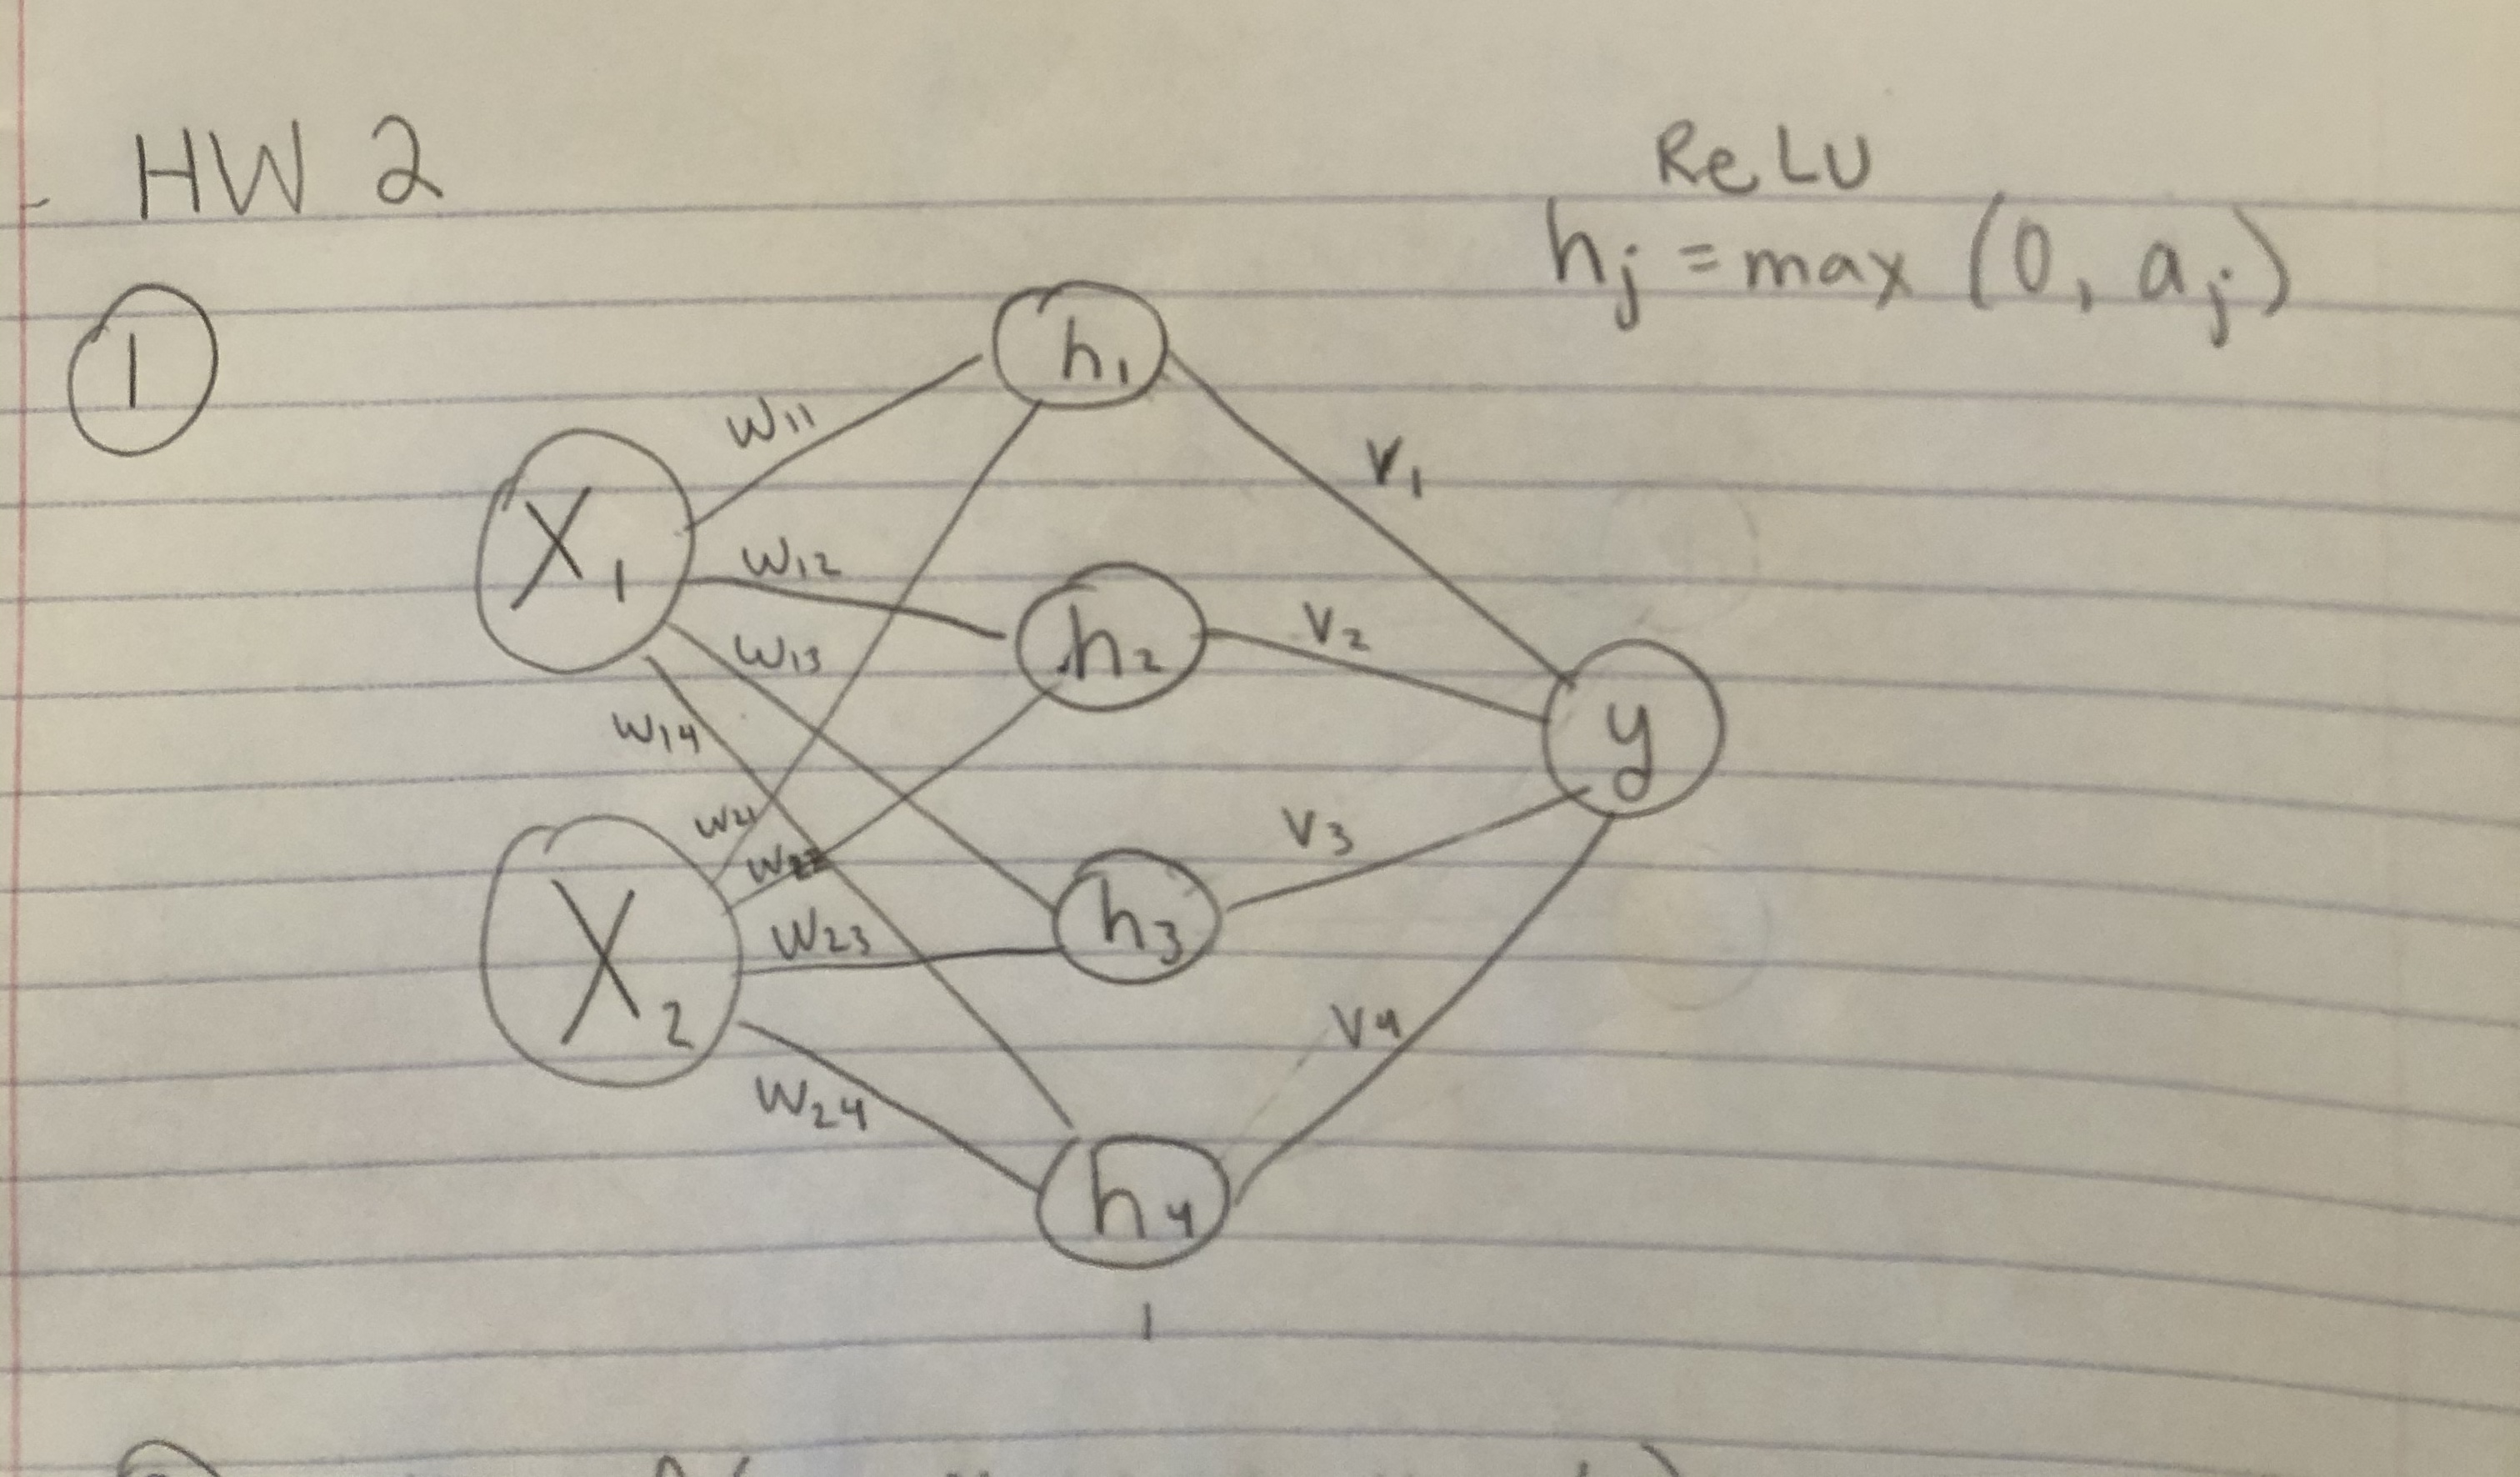

In [8]:
from IPython.display import Image
Image(filename = 'NN_HW2_1.jpeg')

2. Write out the mathematical equation for the output of this network (feel free to break the input-output relationship into multiple equations).

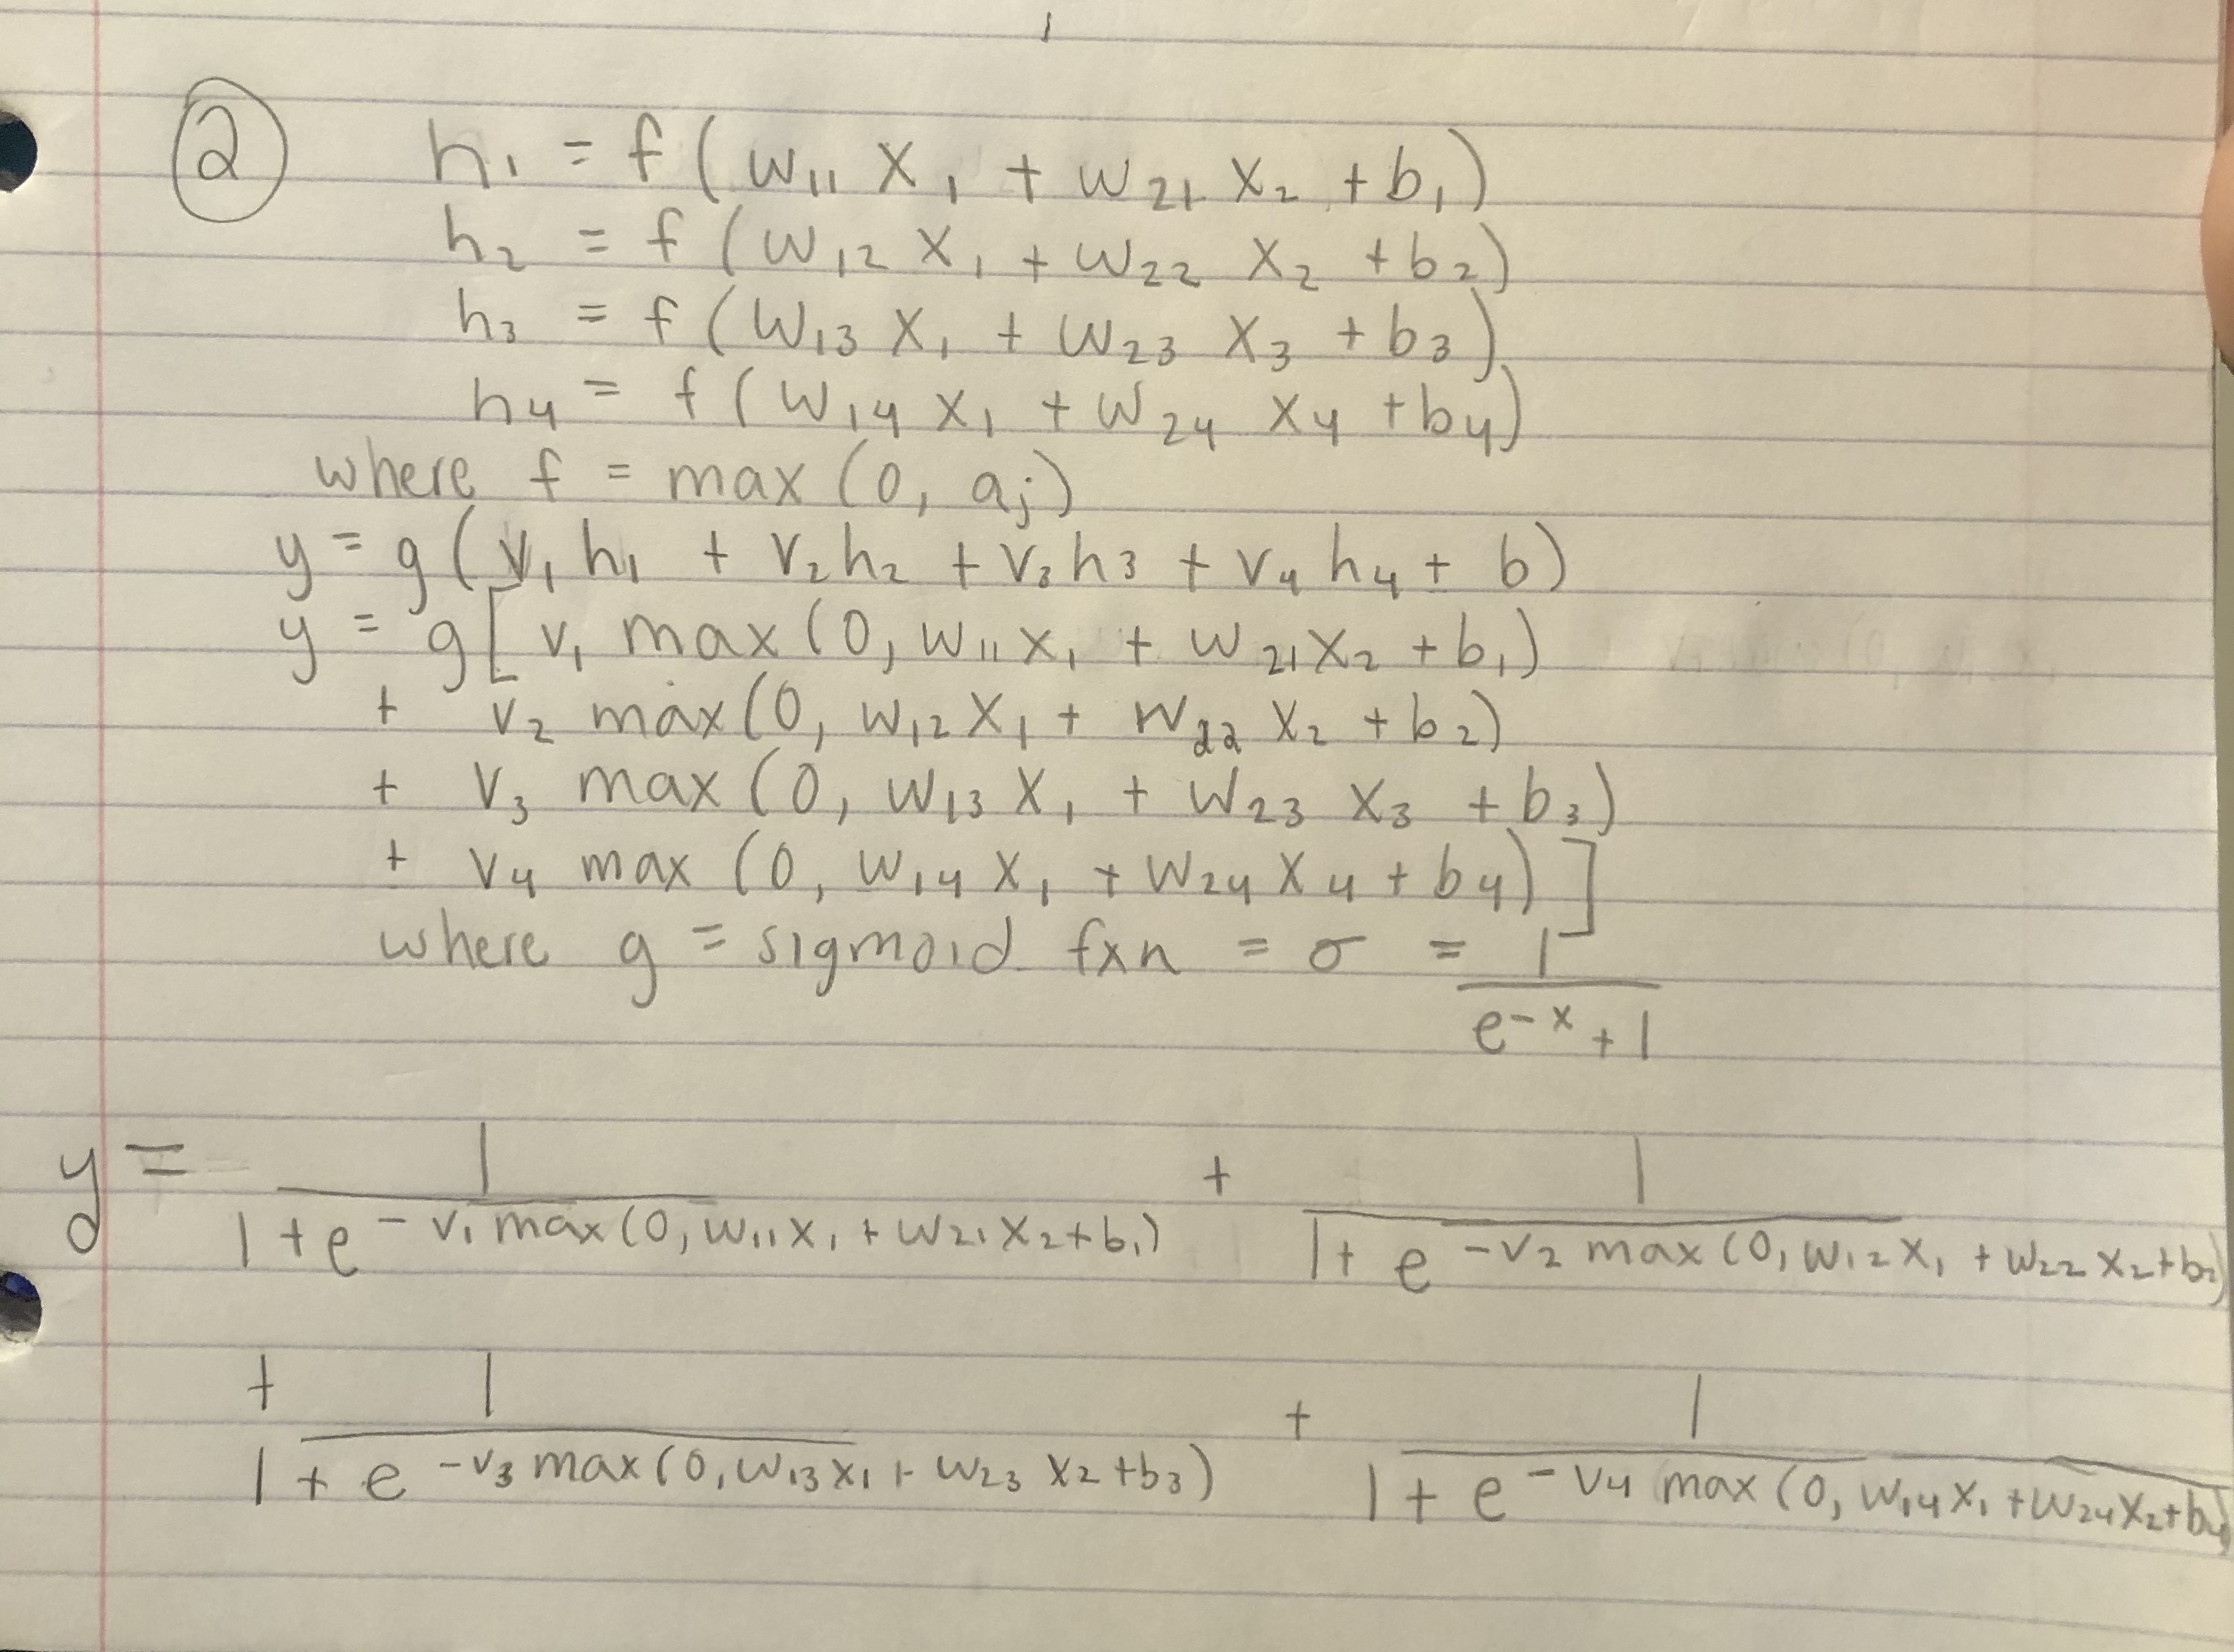

In [7]:
Image(filename = 'NN_HW2_2.jpeg')

3. Write out the forward-pass function in python, call it ff nn ReLu(...)

In [6]:
import matplotlib.pyplot as plt
import numpy as np 

In [47]:
def ReLU(z):
    return np.where(z>0, z, 0)

def sigmoid(z):
    return 1 / (1 + np.exp(-np.array(z)))

In [50]:
def ff_nn_ReLu(x, w, v, b, c):
    hidden = ReLU(np.dot(x, w) + b)
    y_hat = sigmoid(np.dot(hidden, v) + c)
    return y_hat
    

4. What are the class probabilities associated with the forward pass of each sample?

In [39]:
w = np.array([[1, -1, 0, 1], [0, 0, 0.5, 1]])
b = np.array([0, 0, 1, 0])
v = np.array([[1], [0], [-1], [1]])
c = np.array([1])
x = np.array([[1, -1], [0, -1], [0, 1]])

In [51]:
ff_nn_ReLu(x,w,v,b,c)

array([[0.81757448],
       [0.62245933],
       [0.62245933]])

### II. Gradient Descent

1. What are the partial derivatives of f with respect to x and to y?

In [53]:
from sympy import symbols, diff

In [55]:
x, y = symbols('x y', real=True)
f = (3 - x**3) + 50*(2*y**2 - x)**2

In [56]:
# partial derivative of f with respect to x
diff(f, x)

-3*x**2 + 100*x - 200*y**2

In [57]:
# partial derivative of f with respect to y
diff(f, y)

400*y*(-x + 2*y**2)

2. Create a visualization of the contours of this function.

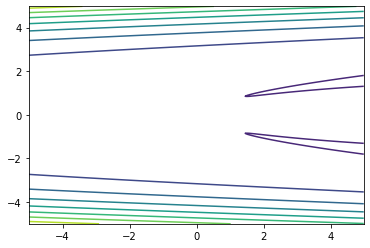

In [155]:
delta = 0.025
x_plot = np.arange(-5.0, 5.0, delta)
y_plot = np.arange(-5.0, 5.0, delta)
X, Y = np.meshgrid(x_plot, y_plot)
Z = (3 - X**3) + 50*(2*Y**2 - X)**2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

3. Write a Gradient Descent algorithm for finding the minimum of the function. Visualize your results with a few different learning rates.

In [156]:
def grad_f(vector):
    x, y = vector
    df_dx = (-3*x**2)+(100*x)-(200*𝑦**2)
    df_dy = 400*y*(-x + 2*y**2)
    return np.array([df_dx, df_dy])

In [261]:
def gradient_descent(starting_point = None, learning_rate = 0.0005, iterations = 10000):
    if starting_point:
        point = starting_point
    else:
        point = np.array([2,0])
    trajectory = [point]
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad

        trajectory.append(point)
    return(np.array(trajectory))

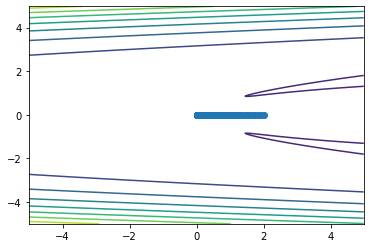

In [265]:
np.random.seed(1)
traj2 = gradient_descent()

fig, ax = plt.subplots()

CS = ax.contour(X,Y,Z)
plt.plot(traj2[:,0], traj2[:,1], '-o')

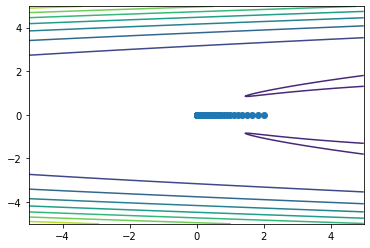

In [264]:
np.random.seed(1)
traj2 = gradient_descent(learning_rate = 0.001)

fig, ax = plt.subplots()

CS = ax.contour(X,Y,Z)
plt.plot(traj2[:,0], traj2[:,1], '-o')

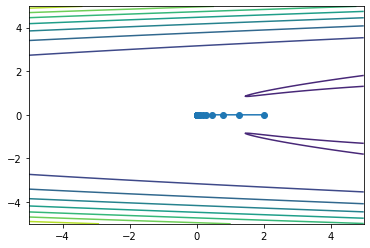

In [263]:
np.random.seed(1)
traj3 = gradient_descent(learning_rate = 0.003)
fig, ax = plt.subplots()
CS = ax.contour(X,Y,Z)
plt.plot(traj4[:,0], traj3[:,1], '-o')

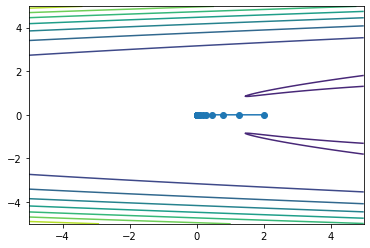

In [262]:
np.random.seed(1)
traj4 = gradient_descent(learning_rate = 0.004)

fig, ax = plt.subplots()

CS = ax.contour(X,Y,Z)
plt.plot(traj4[:,0], traj4[:,1], '-o')

4. Write a Gradient Descent With Momentum algorithm for finding the minimum. Visualize your results with a few different settings of the algorithm’s hyperparameters.


In [266]:
def grad_descent_with_momentum(starting_point=None, iterations=10, epsilon=0.0005, alpha = 0.5):
    if starting_point:
        point = starting_point
    else:
        point = np.array([2,0])

    trajectory = [point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

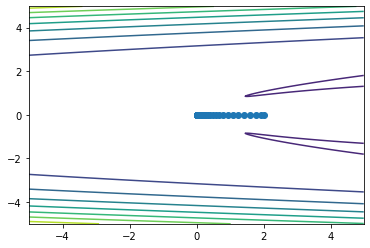

In [279]:
np.random.seed(1)
traj1 = grad_descent_with_momentum(iterations=10000, epsilon=0.0005, alpha=0.6)
fig, ax = plt.subplots()

CS = ax.contour(X, Y, Z)
plt.plot(traj1[:,0], traj1[:,1], '-o')

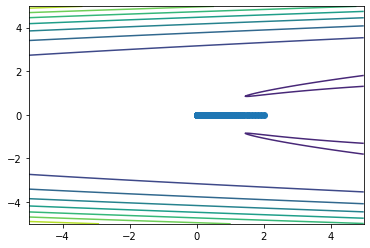

In [270]:
np.random.seed(1)
traj2 = grad_descent_with_momentum(iterations=10000, epsilon=0.0005, alpha=0.01)

fig, ax = plt.subplots()

CS = ax.contour(X, Y, Z)
plt.plot(traj2[:,0], traj2[:,1], '-o')

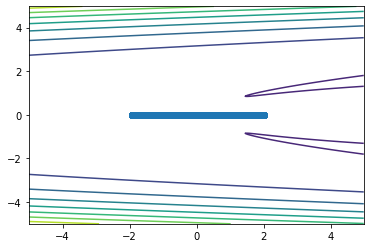

In [271]:
np.random.seed(1)
traj3 = grad_descent_with_momentum(iterations=10000, epsilon=0.0003, alpha=1)

fig, ax = plt.subplots()

CS = ax.contour(X, Y, Z)
plt.plot(traj3[:,0], traj3[:,1], '-o')

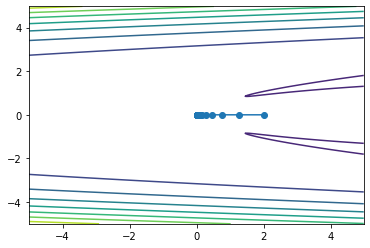

In [275]:
np.random.seed(1)
traj4 = grad_descent_with_momentum(iterations=10000, epsilon=0.004, alpha=0.01)

fig, ax = plt.subplots()

CS = ax.contour(X, Y, Z)

plt.plot(traj4[:,0], traj4[:,1], '-o')

### III. Backprop

1. For the same network as in Question 1, derive expressions of the gradient of the Loss function with respect to each of the model parameters.


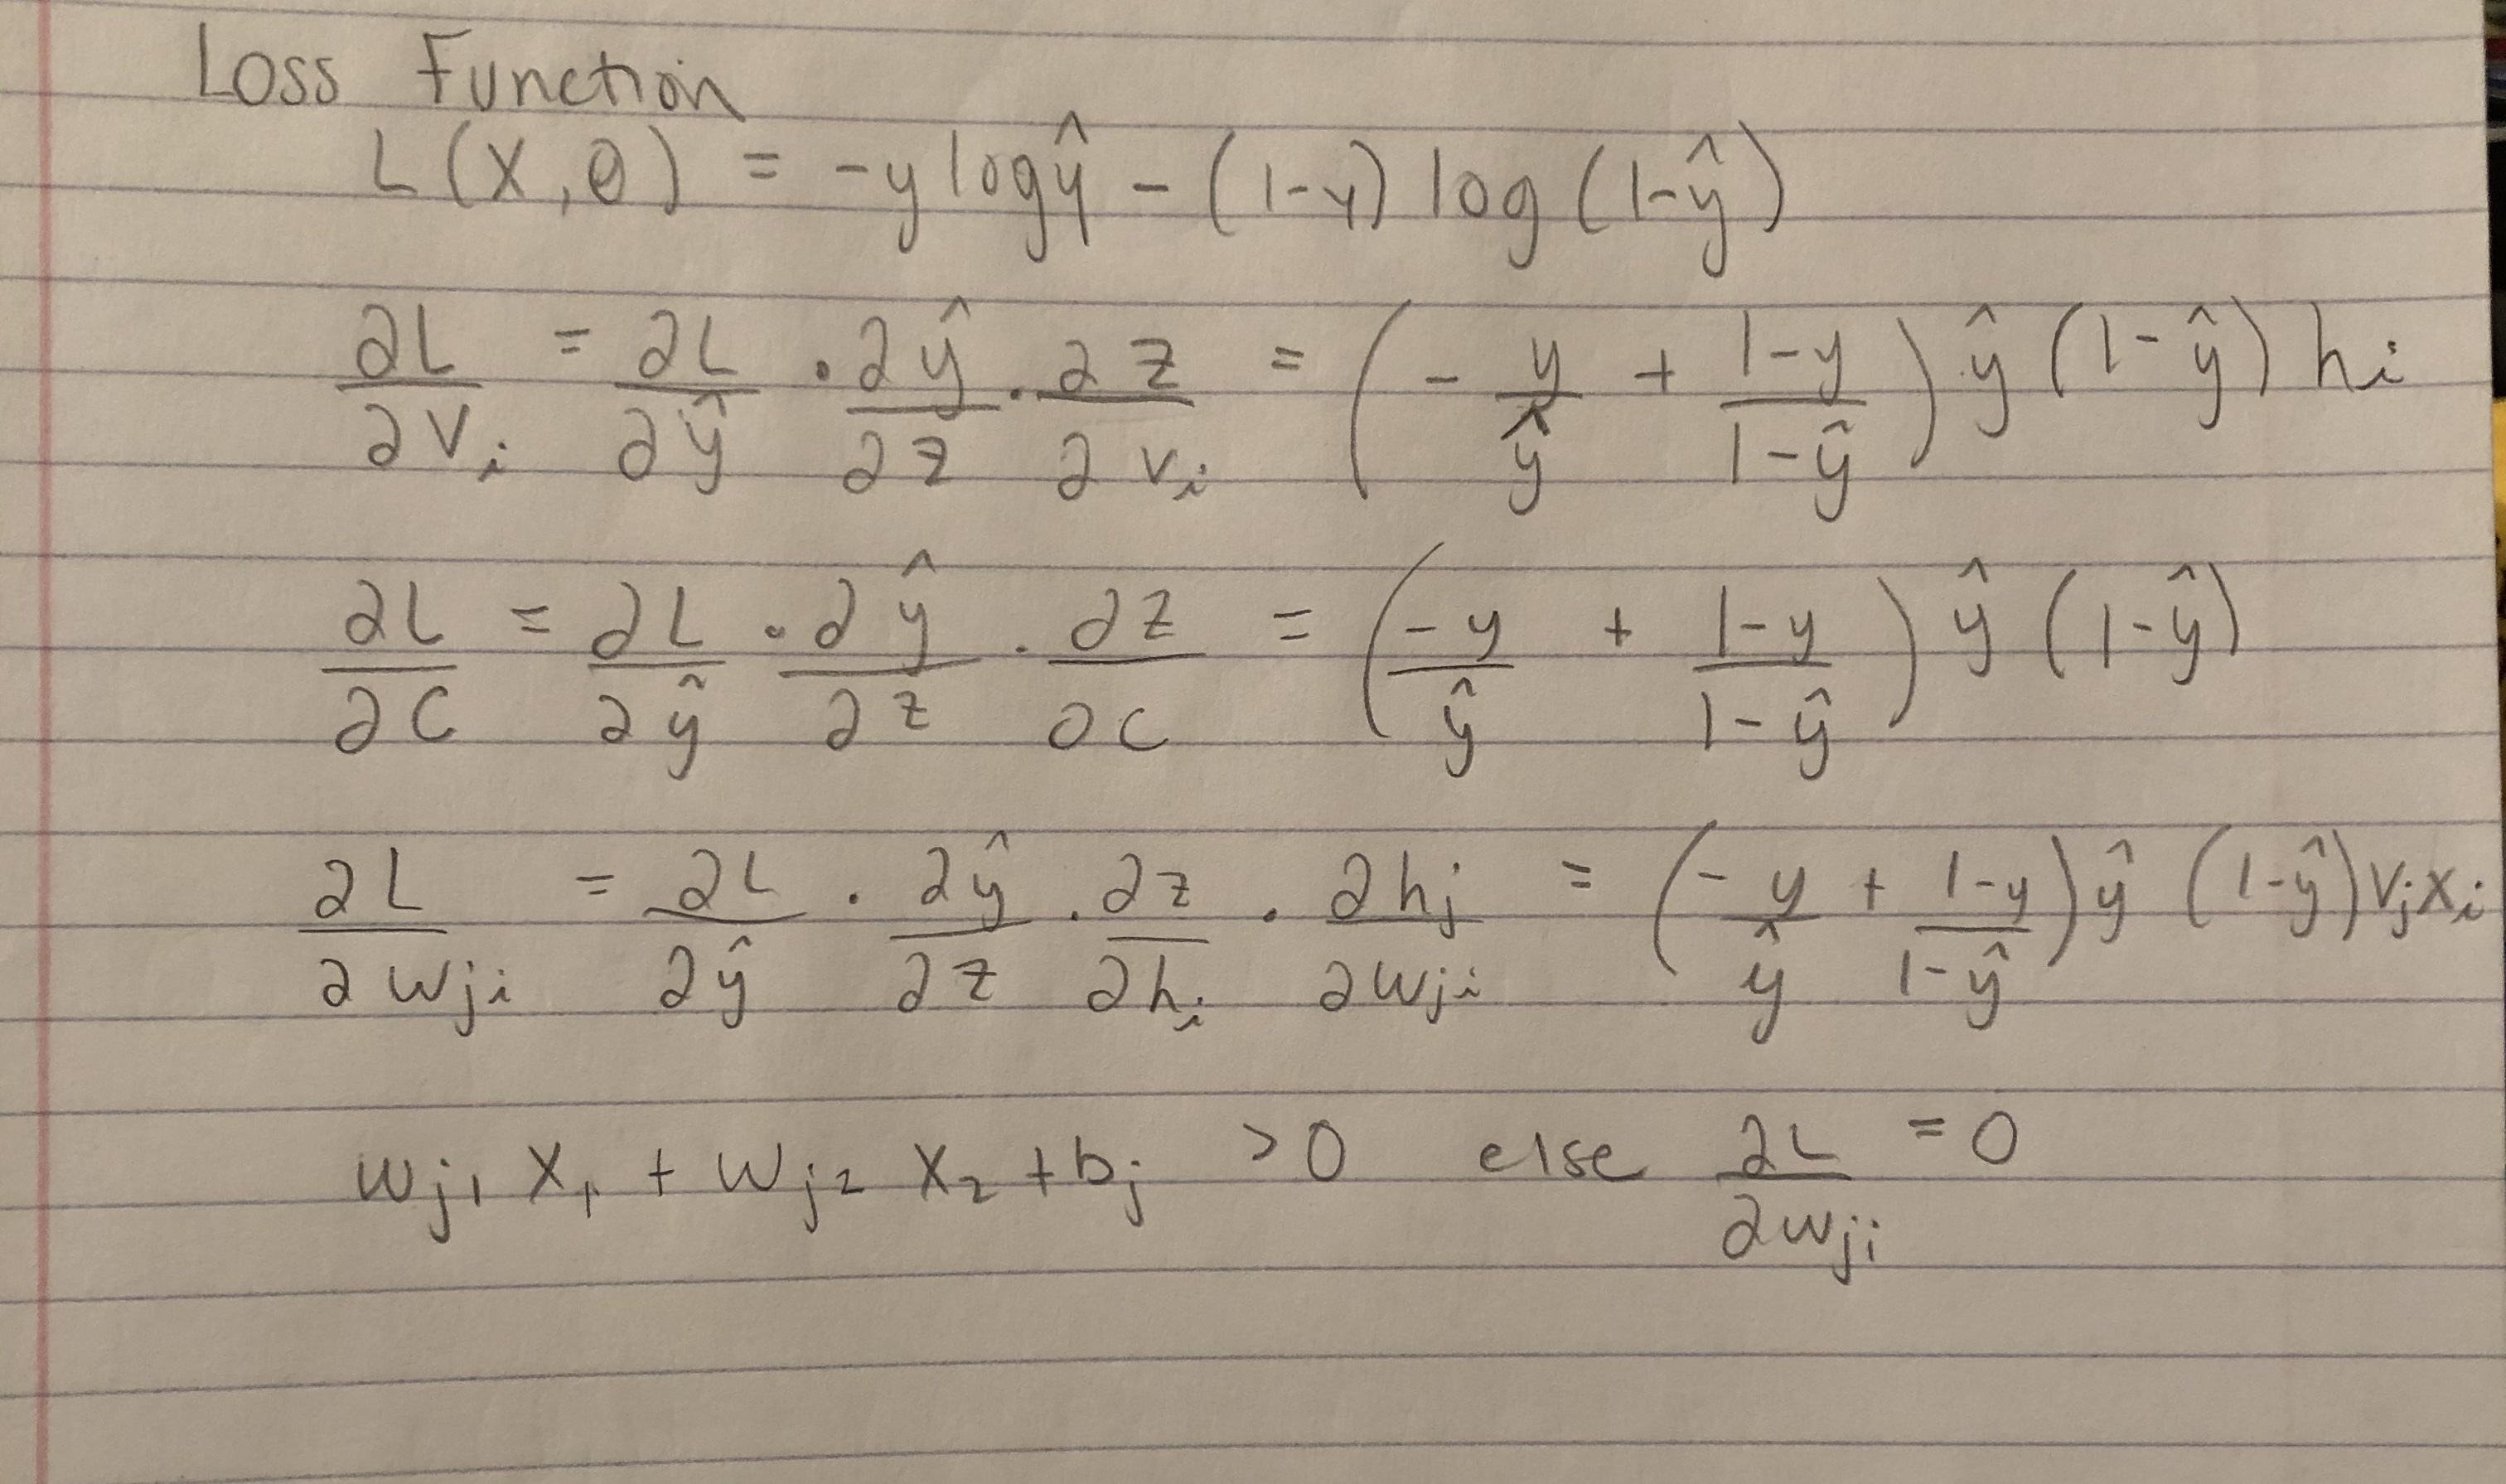

In [338]:
Image(filename = 'NN_HW2_3.jpg')

2. Write a function grad f(...) that takes in a weights vector and returns the gradient of the Loss at that location.

In [388]:
def loss(y, y_hat):
    # binary cross entropy
    return  np.sum(- (y*np.log(y_hat) + (1-y)*np.log(1 - y_hat)))

def relu_derivative(x):
    return np.where(x>0, 1, 0)

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def yhat(x, W, b, v, c):
    # returns model prediction 
    h = ReLU(np.dot(x,W) + b)
    y = sigmoid(np.dot(h,v) + c)
    return y

def binary_xent_residual(y, y_hat):
    return (y/y_hat - (1-y)/(1-y_hat))

def pack_params(param_vec):
    w_11, w_12, w_13,w_14, w_21, w_22, w_23,w_24, b_1, b_2, b_3, b_4, v_1, v_2, v_3, v_4, c = param_vec
    W = np.array([[w_11,w_12, w_13, w_14],[w_21, w_22, w_23, w_24]])
    b = np.array([b_1, b_2, b_3, b_4])
    v = np.array([v_1, v_2, v_3, v_4])
    c = np.array([c])
    return((W, b, v, c))
    
  

In [387]:
def unpack_params_2(W,b,v,c):
    w_11, w_12, w_13, w_14, w_21, w_22, w_23, w_24 = W[0,0], W[0,1], W[0,2], W[0,3], W[1,0], W[1,1], W[1,2], W[1,3]
    b_1, b_2, b_3, b_4 = b[0], b[1], b[2], b[3]
    
    v_11, v_12, v_13, v_14 = V[0,0], V[0,1], V[0,2], V[0,3]
    c_1 = c[0]
    
    return np.array([w_11, w_12, w_13, w_14, w_21, w_22, w_23, w_24, b_1, b_2, b_3, b_4, v_1, v_2, v_3, v_4, c_1]) 

In [456]:
def relu(x, derivative=False):
    r = np.where(x > 0, x, 0)
    if derivative == True:
        return np.where(x > 0, 1, 0)
    return r


In [457]:
def grad_f2(X, Y, W, V, b, c):
    y = Y
    in_put = np.array(np.dot(X, W) + b)
    h = relu(in_put)
    y_hat = sigmoid(np.dot(h, V) + c)
    dLdc = (y_hat-y).sum()
    dLdV = np.dot(h.T, y_hat - y)
    dLdb = (np.dot(y_hat - y, V.T) * relu(in_put, derivative = True)).sum(axis=0)
    dLdW = np.dot(X.T, np.dot(y_hat-y, V.T)*relu(in_put, derivative = True))   
    
    return (dLdW, dLdV, dLdb, dLdc)
    
    

In [458]:
W = np.random.randn(6).reshape(2,3)
V = np.random.randn(3).reshape(3,1)
b = np.random.randn(3).reshape(1,3)
c = np.random.randn(1)

X = np.random.randn(1000).reshape((500,2))
Y = np.random.randn(500).reshape((500,1))

grad_f2(X, Y, W, V, b, c)

(array([[  1.84265696, -22.91204387,  22.0881246 ],
        [ -0.41575012,  -2.08141542,  -2.56695458]]),
 array([[582.57532816],
        [ 12.12943368],
        [279.98616066]]),
 array([  8.96882785,  14.33830874, -55.03157192]),
 265.8446181821448)

3. Generate a synthetic dataset like the XOR pattern (see below).

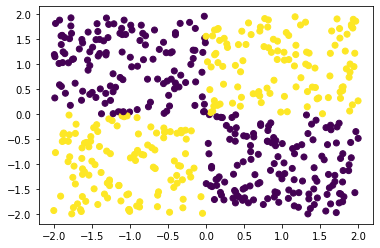

In [459]:

x_xor = np.random.uniform(low = -2,high = 2, size=1000).reshape((500,2))
y_xor = np.zeros((500,1))

y_xor[np.logical_and(x_xor[:,0] > 0, x_xor[:,1] > 0)] = 1
y_xor[np.logical_and(x_xor[:,0] < 0, x_xor[:,1] < 0)] = 1

plt.scatter(x_xor[:,0], x_xor[:,1], c = y_xor[:,0])
plt.show()

4. Fit your network using Gradient Descent. Keep track of the total Loss at each iteration and plot the result.


In [461]:

x = x_xor
y = y_xor
W = np.array([[1, -1, 0, 1], 
              [0, 0, 0.5, 1]])
b = np.array([0, 0, 1, 0])
V = np.array([[1], [0], [-1], [1]])
c = np.array([1])


loss = []

alpha = 0.001
    
for i in range(100):
    gradient = grad_f2(x, y, W, V, b, c)
    
    dLdW, dLdV, dLdb, dLdc = gradient
    
    W = W - alpha * dLdW
    b = b - alpha * dLdb
    V = V - alpha * dLdV
    c = c - alpha * dLdc
    xw = np.dot(x, W) + b
    xw[xw < 0] = 0
    output  = np.dot(xw, V) + c
    y_hat = 1. / (1 + np.exp(-output))
    
    loss.append(- sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)))

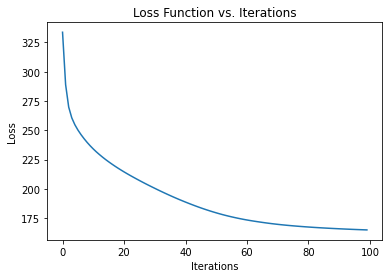

In [464]:
plt.plot(range(0,100), loss)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Function vs. Iterations')
plt.show()

5. Repeat the exercise above using Momentum. Comment on whether your algorithm seems to converge more efficiently. 

In [465]:

x = x_xor
y = y_xor
W = np.array([[1, -1, 0, 1], 
              [0, 0, 0.5, 1]])
b = np.array([0, 0, 1, 0])
V = np.array([[1], [0], [-1], [1]])
c = np.array([1])

vs = np.zeros(x.size)
params = (W, V, b, c)

trajectory = []
loss = []

alpha = 0.0001
epsilon = 0.0001

for i in range(1000):    
    gradients = grad_f2(x, y, W, V, b, c)
    new_params = []  
    for (i, m, v) in zip(params, gradients, vs):
        new_params.append(i - epsilon * m - alpha * v)
        
    vs = gradients
    params = tuple(new_params)
    
    W, V, b, c = params
    
    h = relu(np.dot(x, W) + b)
    y_hat = sigmoid(np.dot(h, V) + c)
    
    trajectory.append(params)
    loss.append(- sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)))

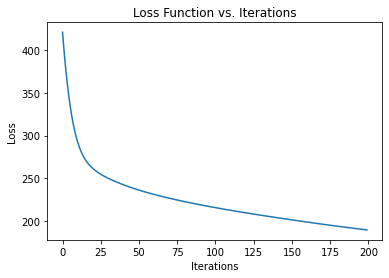

In [474]:
plt.plot(range(0,200), loss[0:200])
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Function vs. Iterations')
plt.show()

6. Plot a visualization of the final decision boundary that your model has learned. Overlay the datapoints in this plot.


In [475]:
def get_y_hat(x, params):
    W, V, b, c = params
    h = relu(np.dot(x, W) + b)
    y = sigmoid(np.dot(h, V) + c)
    return y

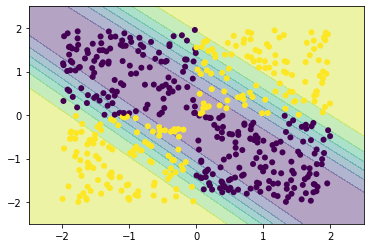

In [476]:
x_span = np.linspace(-2.5, 2.5, 1000)
y_span = np.linspace(-2.5, 2.5, 1000)
xx, yy = np.meshgrid(x_span, y_span)
values = get_y_hat(np.c_[xx.ravel(), yy.ravel()], trajectory[-1])
z = values.reshape(xx.shape)
fig, ax = plt.subplots()
ax.contourf(xx, yy, z, alpha=0.4)
ax.scatter(x[:,0],x[:,1], c=y[:,0], lw=0)
plt.show()